# Sentiment Analysis of *The Times* Music Reviews
## Part II: Corpus Analysis and Summarization
*How have artforms been reported?  Is there a status hierarchy between them?  How has this changed over time?*

* **Project:** What counts as culture?  Reporting and criticism in The Times 1785-2000
* **Project Lead:** Dave O'Brien
* **Developer:** Lucy Havens
* **Funding:** from the Centre for Data, Culture & Society, University of Edinburgh
* **Dataset:** 83,625 reviews about music published in The Times from 1950 through 2009

Begun March 2021

Let's summarize our corpus and visualize the results so we can get an overview of the data we're working with.

In [1]:
# for data loading analysis
import re
import string
import numpy as np
import pandas as pd

# for data visualization
import matplotlib.pyplot as plt
import altair as alt   ###  Need to figure out why Altair returns error! (Javascript Error: Unrecognized transform type: "formula")
import seaborn as sns

# for text analysis
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
# nltk.download('punkt')
from nltk.corpus import PlaintextCorpusReader
# nltk.download('wordnet')
from nltk.corpus import wordnet
# nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.text import Text

## 1. Text Analysis
We'll begin by determining the number of words and sentences per article so we can study the change in article lenghts over time and by genre.

**Step 1:** Split the running text of the music reviews into words and sentences.

In [2]:
data_path = "../TheTimes_DaveO/TheTimesMusicReviews_1950-2009"
articles = PlaintextCorpusReader(data_path, ".+/.+", encoding='utf-8')

In [3]:
fileids = articles.fileids()
tokens = []
for fileid in fileids:
    tokens += [word_tokenize(articles.raw(fileid))]
print("Sample of Tokens (strings of characters estimated to be words):\n", tokens[0][0:15])

Sample of Tokens (strings of characters estimated to be words):
 ["'SOME", 'NEW', 'SCORES', 'MOTET', 'AND', 'OPERA', 'BY', 'OUR', 'MUSIC', 'CRIrIC', 'Music', 'publishing', 'has', 'got', 'into']


In [4]:
# for fileid in fileids:
#     article_tokens = tokens.fileid(fileid)
#     # Create a list of all the alphabetic tokens in the music reviews so that we can 
#     # count the number of words per music review
#     alpha_tokens = [t for t in article_tokens if t.isalpha()]
#     # Create a list of all the alphabetic tokens (words) and numbers in the music reviews
#     # so that we can count the words, numbers and dates per music review
#     alphanum_tokens = [t for t in article_tokens if t.isalnum()]


# print("Sample of Words:\n", alpha_tokens[100][100:115])
# print("\nSample of Alphanumeric Tokens (words, numbers, dates):\n", alphanum_tokens[20][1000:1015])

In [5]:
sentences = []
for fileid in fileids:
    sentences += [sent_tokenize(articles.raw(fileid))]
print("Sample sentence:", sentences[0][10])

Sample sentence: Its score, apparently enlarged by photographic process from Tudor Church Miusic by permission of the Carnegie Trust, is issued by the Oxford University Press at the remarkable price of 3s.


**Step 2:** Now that we have split the running text of the articles into words and sentences, let's count the number of words and sentences per article.

In [6]:
def countPerArticle(article_list):
    lengths_list = []
    for article in article_list:
        lengths_list += [len(article)]
    return lengths_list

tokens_per_article = countPerArticle(tokens)
sents_per_article = countPerArticle(sentences)

In [7]:
identifiers = []
for fileid in fileids:
    identifiers += [int(re.findall("\d{5,}",fileid)[0])]
print(identifiers[0])

20787


In [86]:
df_lengths = pd.DataFrame({"identifier":identifiers, "word count":tokens_per_article, "sentence count":sents_per_article})
df_lengths.head()

,identifier,word count,sentence count
0,20787,849,42
1,20788,367,14
2,20789,386,11
3,20790,383,8
4,20791,738,23


With this table we can quickly calculate the longest, shortest, and average lengths of music reviews.

In [87]:
print("Most Words:", max(df_lengths["word count"]))
print("Fewest Words:", min(df_lengths["word count"]))
print("Average Words:", np.mean(df_lengths["word count"]))
print("Standard Deviation:", np.std(df_lengths["word count"]))
print("\nMost Sentences:", max(df_lengths["sentence count"]))
print("Fewest Sentences:", min(df_lengths["sentence count"]))
print("Average Sentences:", np.mean(df_lengths["sentence count"]))
print("Standard Deviation:", np.std(df_lengths["sentence count"]))

Most Words: 12690
Fewest Words: 9
Average Words: 664.8419850523169
Standard Deviation: 523.0112775422288

Most Sentences: 867
Fewest Sentences: 1
Average Sentences: 26.25595216741405
Standard Deviation: 24.638387926951495


Nice!

Now we can write this table to a CSV for safekeeping.

In [10]:
df_lengths.to_csv("../TheTimes_DaveO/TheTimesArticlesLengths_1950-2009.csv")

**Step 3:** Lastly, let's visualize the table so we can get a broader overview of how the music reviews' lengths compare.  To do this, let's begin by joining up the lengths information with the inventory containing metadata for each music review.  Then, we can calculate lengths by genre, by year, and by author.

We'll load the inventory...

In [88]:
dfi = pd.read_csv("../TheTimes_DaveO/TheTimesArticles_1950-2009_Inventory.csv")
dfi.rename(columns={"Unnamed: 0":"identifier"}, inplace=True)
dfi.head()

,identifier,title,year,author,term,section,pages,filename,article_id,issue_id
0,20787,SOME NEW SCORES MOTET AND OPERA,1950,BY OUR MUSIC CRITIC,"[' bands', ' composer', ' musical', ' opera', ...",Reviews,[],/lustre/home/dc125/shared/TDA_GDA_1785-2009/19...,0FFO-1950-JUN30-008-023,0FFO-1950-JUN30
1,20788,"THE ROYAL OPERA "" TRISTAN AND ISOLDE """,1950,'',"[' opera', ' orchestra']",Reviews,[],/lustre/home/dc125/shared/TDA_GDA_1785-2009/19...,0FFO-1950-JUN30-008-027,0FFO-1950-JUN30
2,20789,GROWING TASTE FOR MUSIC PLEA FOR ENLARGED QUEE...,1950,'',[' country'],Reviews,[],/lustre/home/dc125/shared/TDA_GDA_1785-2009/19...,0FFO-1950-JUN30-008-032,0FFO-1950-JUN30
3,20790,ROYAL PHILHARMONIC CONCERT BEECHAM AND MOZART,1950,'',"[' orchestra', ' orchestras']",Reviews,['010'],/lustre/home/dc125/shared/TDA_GDA_1785-2009/19...,0FFO-1950-MAR02-010-006,0FFO-1950-MAR02
4,20791,MUSICAL JOURNALS SOME NEWCOMERS,1950,BY OUR MUSIC CRITIC,"[' musical', ' orchestra', ' orchestras']",Reviews,['007'],/lustre/home/dc125/shared/TDA_GDA_1785-2009/19...,0FFO-1950-MAR03-007-010,0FFO-1950-MAR03


...merge it with the lengths table...

In [89]:
df = dfi.merge(df_lengths, how="outer", on="identifier")
df.head()

,identifier,title,year,author,term,section,pages,filename,article_id,issue_id,word count,sentence count
0,20787,SOME NEW SCORES MOTET AND OPERA,1950,BY OUR MUSIC CRITIC,"[' bands', ' composer', ' musical', ' opera', ...",Reviews,[],/lustre/home/dc125/shared/TDA_GDA_1785-2009/19...,0FFO-1950-JUN30-008-023,0FFO-1950-JUN30,849,42
1,20788,"THE ROYAL OPERA "" TRISTAN AND ISOLDE """,1950,'',"[' opera', ' orchestra']",Reviews,[],/lustre/home/dc125/shared/TDA_GDA_1785-2009/19...,0FFO-1950-JUN30-008-027,0FFO-1950-JUN30,367,14
2,20789,GROWING TASTE FOR MUSIC PLEA FOR ENLARGED QUEE...,1950,'',[' country'],Reviews,[],/lustre/home/dc125/shared/TDA_GDA_1785-2009/19...,0FFO-1950-JUN30-008-032,0FFO-1950-JUN30,386,11
3,20790,ROYAL PHILHARMONIC CONCERT BEECHAM AND MOZART,1950,'',"[' orchestra', ' orchestras']",Reviews,['010'],/lustre/home/dc125/shared/TDA_GDA_1785-2009/19...,0FFO-1950-MAR02-010-006,0FFO-1950-MAR02,383,8
4,20791,MUSICAL JOURNALS SOME NEWCOMERS,1950,BY OUR MUSIC CRITIC,"[' musical', ' orchestra', ' orchestras']",Reviews,['007'],/lustre/home/dc125/shared/TDA_GDA_1785-2009/19...,0FFO-1950-MAR03-007-010,0FFO-1950-MAR03,738,23


...and then create subsets of the data to visualize!

## 2. Data Visualization

### 2.1 Article Lengths
Visualize...
* Words per Article per Genre
* Sentences per Article per Genre
* Words per Article per Author
* Sentences per Article per Author
* Yearly Average Words per Article
* Yearly Average Sentences per Article

First, let's look at the **total words and sentences per article** to get a sense of the variation in the length of our corpus of music reviews:

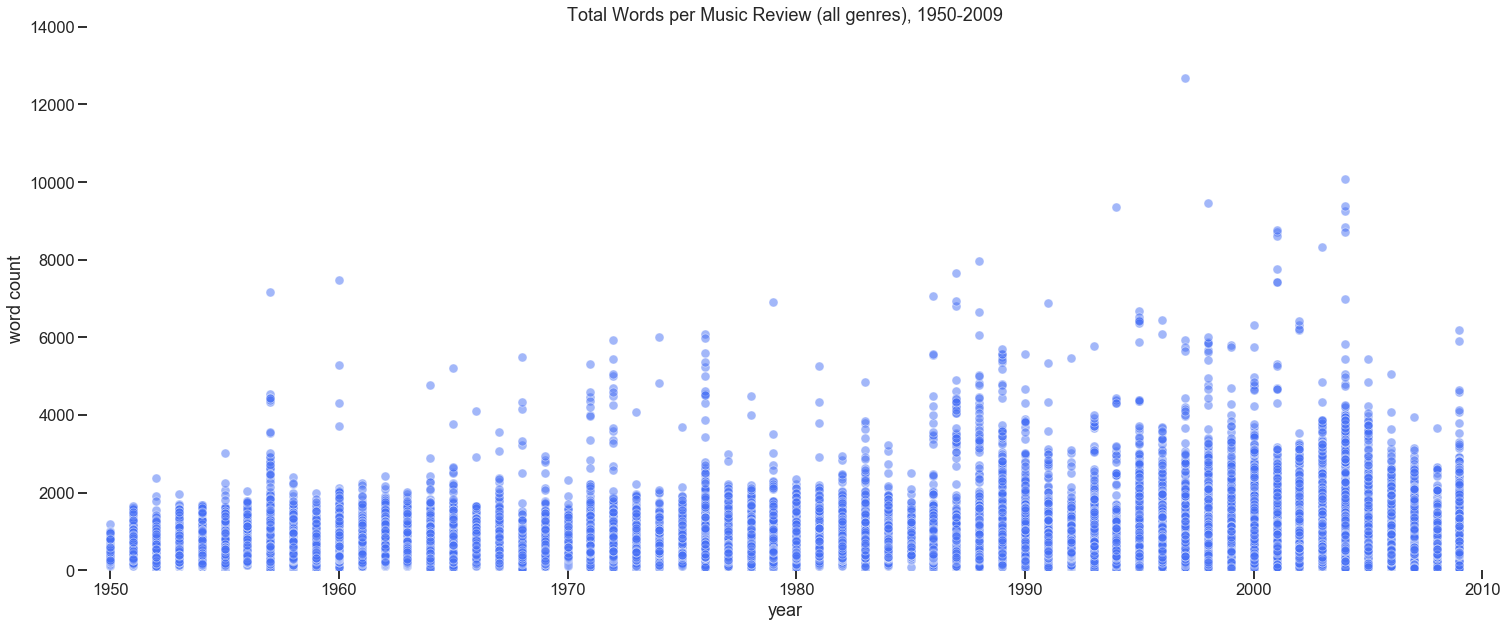

In [133]:
# Total words per article
sns.set_context("talk")
sns.set_style("ticks")
lengths_viz = plt.figure(figsize=(25,10))
lengths_viz = sns.scatterplot(data=df, x="year", y="word count", color="#4770f5", alpha=0.5)
lengths_viz.set(title="Total Words per Music Review (all genres), 1950-2009", ylim=(0,14000), xlim=(1949,2010))
sns.despine(left=True, bottom=True)
plt.show()
lengths_viz.figure.savefig("words_per_review_scatter_plot.png")

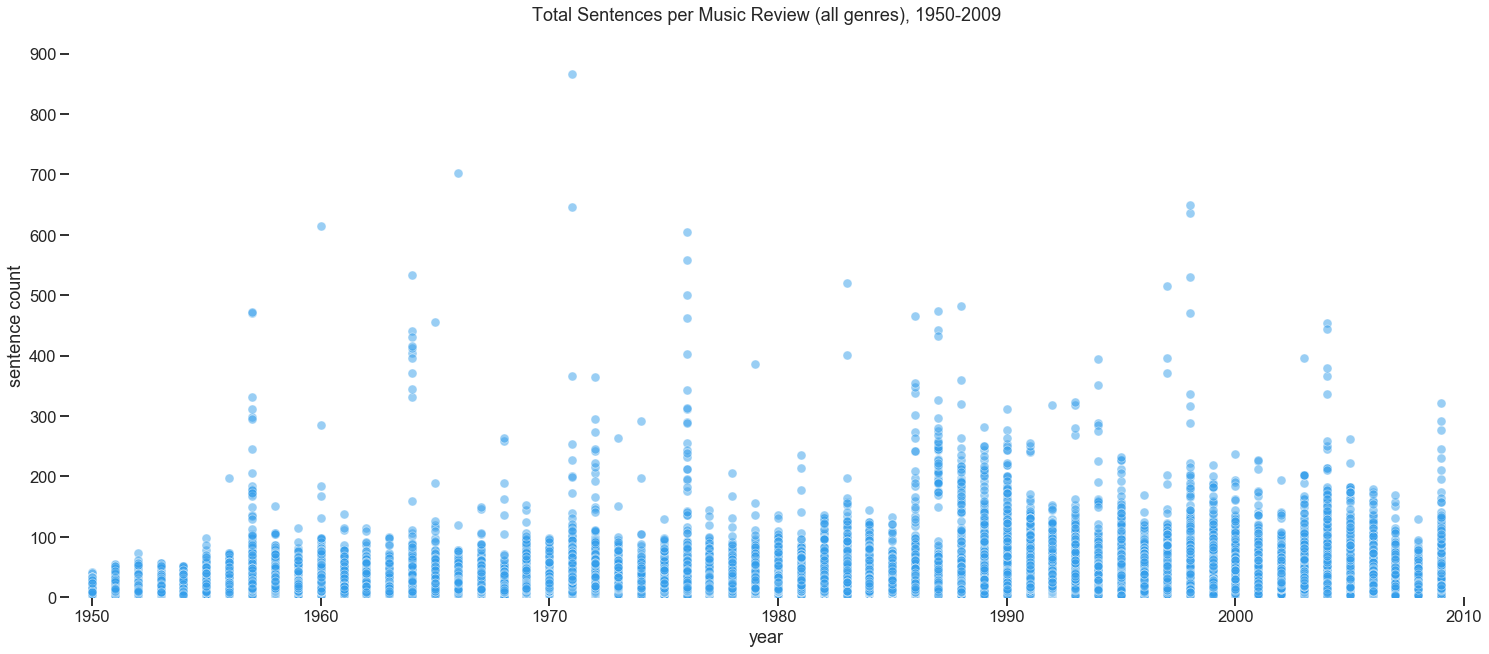

In [134]:
# Total sentences per article
sns.set_context("talk")
sns.set_style("ticks")
lengths_viz = plt.figure(figsize=(25,10))
lengths_viz = sns.scatterplot(data=df, x="year", y="sentence count", color="#349eeb", alpha=0.5)
lengths_viz.set(xlim=(1949,2010), ylim=(0,900))
sns.despine(left=True, bottom=True)
plt.title("Total Sentences per Music Review (all genres), 1950-2009", y=1.05)
plt.show()
lengths_viz.figure.savefig("sentences_per_review_scatter_plot.png")

In [ ]:
# Total words per article per genre

In [ ]:
# Total sentences per article per genre

In [200]:
df[df.author == "Ian Johns"].shape

(245, 12)

In [187]:
# Calculate the words and sentences each author contributed
df_author = pd.DataFrame({"author":list(df.author), "word count":list(df["word count"]), "sentence count":list(df["sentence count"])})
df_author_sum = df_author.groupby("author").sum().reset_index()
print("Unique authors:",df_author_sum.shape[0])
print("\nMax word count:", max(df_author_sum["word count"]))
print("Min word count:", min(df_author_sum["word count"]))
print(" - Std dev:", np.std(df_author_sum["word count"]))
print("\nMax sentence count:", max(df_author_sum["sentence count"]))
print("Min sentence count:", min(df_author_sum["sentence count"]))
print(" - Std dev:", np.std(df_author_sum["sentence count"]))
df_author_sum.head()

Unique authors: 5358

Max word count: 12573662
Min word count: 13
 - Std dev: 182019.4091109452

Max sentence count: 494767
Min sentence count: 1
 - Std dev: 7157.2613128254825


,author,word count,sentence count
0,"""Andr\xE9 Previn,""",1434,60
1,"""Bj\xF6rk Vespertine""",353,11
2,"""By Jurek Becker (Harcourt Brace Jovanovich, \...",637,23
3,"""By Michael Levey (Thames & Hudson, \xA35.50) ...",1135,30
4,"""By Shaun Herron (Cape, \xA32.50) By Yvonne Mi...",744,35


Since it's difficult to visualize over 5,000 authors in a single chart, I'm going to select 10 authors with the largest article, word and sentence counts to visualize: 

In [217]:
# Calculate total articles per author, skipping unknown authors ('')
df_author_articles = pd.DataFrame(df.author.value_counts(sort=True, ascending=False))
print("Max articles:", max(df_author_articles["author"]))
print("Min articles:", min(df_author_articles["author"]))
print("Std dev:", np.std(df_author_articles["author"]))
max_articles = df_author_articles.iloc[1:11].reset_index()
max_articles.rename(columns={"index":"author", "author":"total articles"}, inplace=True)
max_articles

Max articles: 20772
Min articles: 1
Std dev: 299.0041570339103


,author,total articles
0,Hilary Finch,2630
1,Richard Morrison,2214
2,Geoff Brown,2020
3,David Sinclair,1997
4,Paul Griffiths,1914
5,John Percival,1753
6,William Mann,1450
7,FROM OUR SPECIAL CORRESPONDENT,1322
8,Stephen Pettitt,1279
9,Clive Davis,1212


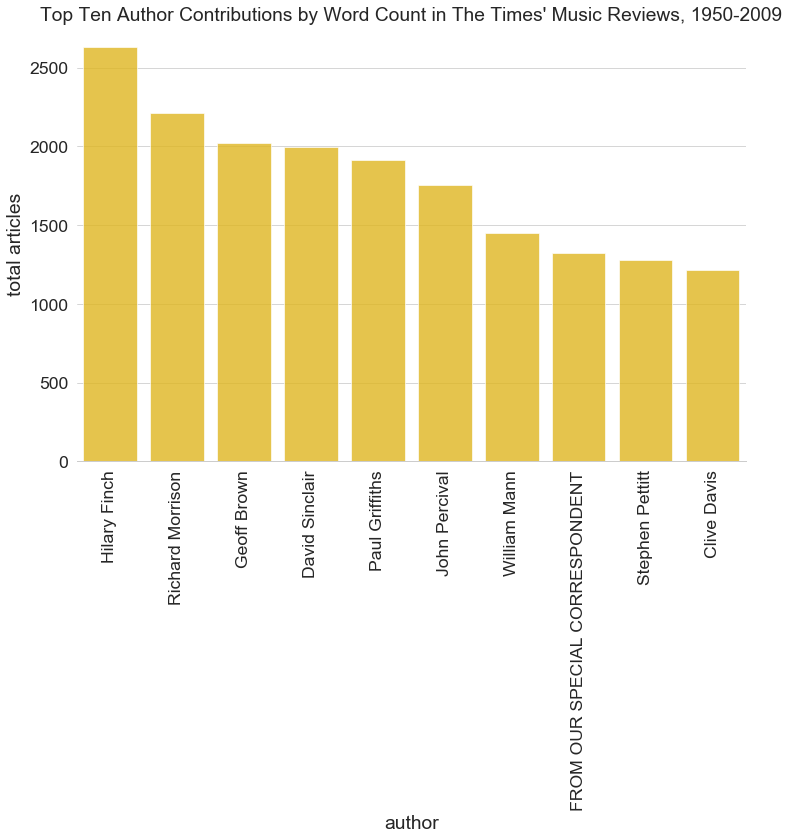

In [219]:
# Visualize top ten contributing authors by article count
sns.set_context("paper", font_scale=2)
sns.set_style("whitegrid")
lengths_viz = plt.figure(figsize=(12,8))
lengths_viz = sns.barplot(data=max_articles, x="author", y="total articles", color="#ffc800", alpha=0.8)
lengths_viz.set(title="Top Ten Author Contributions by Word Count in The Times' Music Reviews, 1950-2009")
lengths_viz.set_xticklabels(lengths_viz.get_xticklabels(), rotation=90)
sns.despine(left=True)
plt.show()
lengths_viz.figure.savefig("top_ten_author_articles_bar_chart.png")

In [158]:
df_author_sum.sort_values("word count", inplace=True)
# df_author_sum.head(10)
max_words = df_author_sum.iloc[-11:-1]
print(max_words)

df_author_sum.sort_values("sentence count", inplace=True)
# df_author_sum.head(10)
max_sents = df_author_sum.iloc[-11:-1]
print("\n",max_sents)

                              author  word count  sentence count
1750           FROM OUR MUSIC CRITIC      735327           24600
5225                    William Mann      926910           34317
1121                  Chris Campling      993763           27820
1767  FROM OUR SPECIAL CORRESPONDENT     1041854           38217
2986                   John Percival     1048429           42284
4052                  Paul Griffiths     1049439           38653
2176                     Geoff Brown     1285296           57644
2408                    Hilary Finch     1347645           51797
1431                  David Sinclair     1367899           44787
4423                Richard Morrison     1405741           62996

                               author  word count  sentence count
1121                  Chris Campling      993763           27820
2929                    John Higgins      708785           32389
5225                    William Mann      926910           34317
1767  FROM OUR SPECIAL 

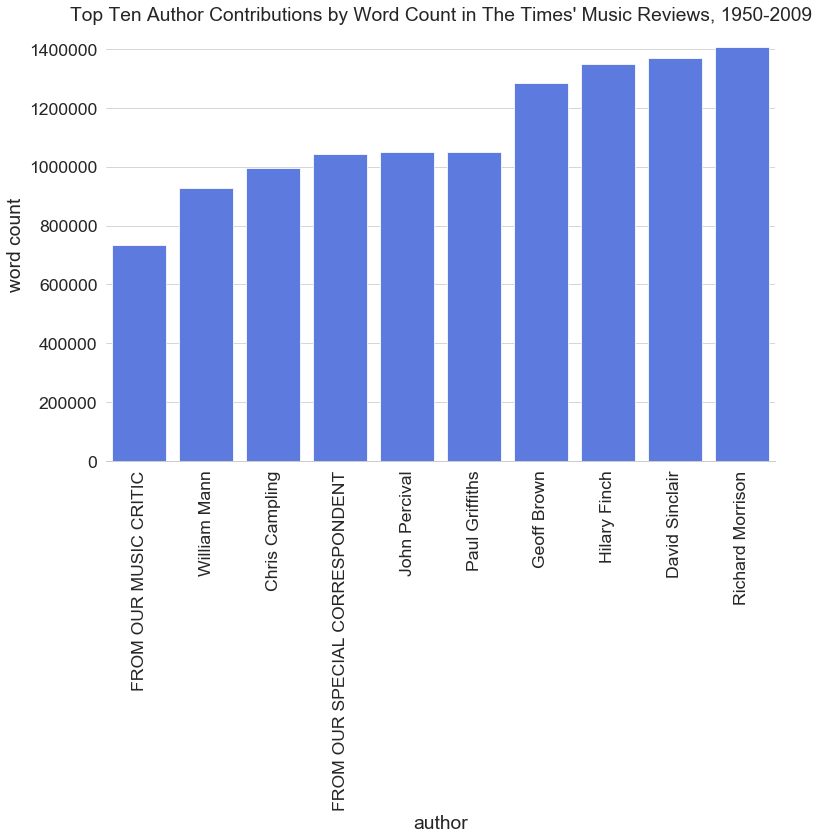

In [178]:
# Top ten authors by word count
sns.set_context("paper", font_scale=2)
sns.set_style("whitegrid")
lengths_viz = plt.figure(figsize=(12,8))
lengths_viz = sns.barplot(data=max_words, x="author", y="word count", color="#4770f5")
lengths_viz.set(title="Top Ten Author Contributions by Word Count in The Times' Music Reviews, 1950-2009")
lengths_viz.set_xticklabels(lengths_viz.get_xticklabels(), rotation=90)
sns.despine(left=True)
plt.show()
lengths_viz.figure.savefig("top_ten_author_words_bar_chart.png")

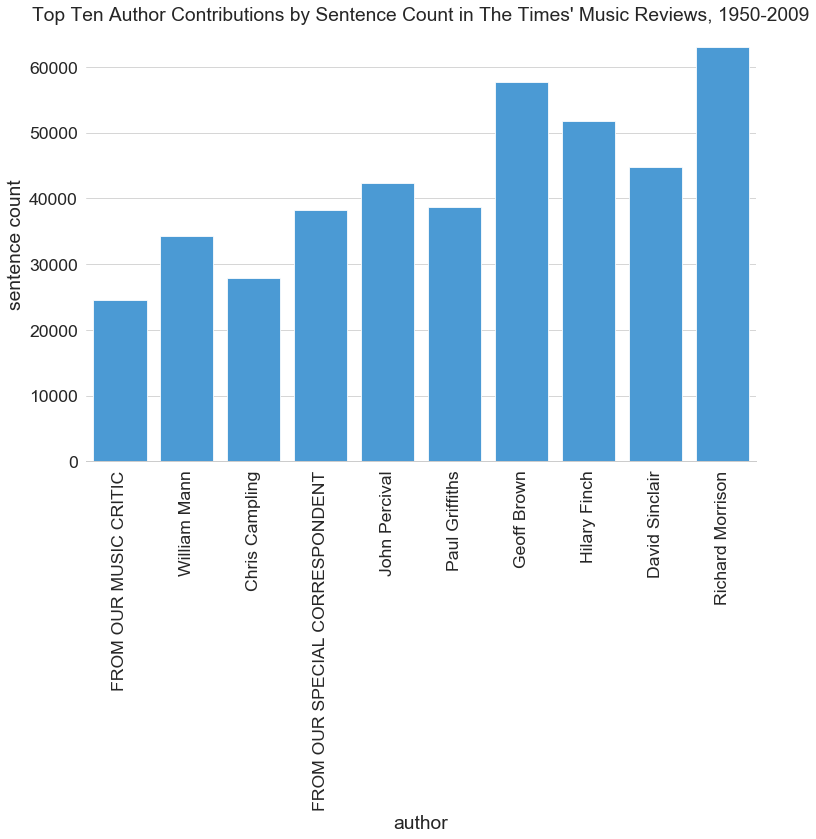

In [179]:
# Top ten authors by sentence count
sns.set_context("paper", font_scale=2)
sns.set_style("whitegrid")
lengths_viz = plt.figure(figsize=(12,8))
lengths_viz = sns.barplot(data=max_words, x="author", y="sentence count", color="#349eeb")
lengths_viz.set(title="Top Ten Author Contributions by Sentence Count in The Times' Music Reviews, 1950-2009")
lengths_viz.set_xticklabels(lengths_viz.get_xticklabels(), rotation=90)
sns.despine(left=True)
plt.show()
lengths_viz.figure.savefig("top_ten_author_sentences_bar_chart.png")

Next, let's visualize the **yearly averages** for the total words and sentences per article:

In [45]:
# Calcuate the average total words and average total sentences across all articles in each year from 1950 through 2009
df_yearly = pd.DataFrame({"year":list(df.year), "word count":list(df.word_count), "sentence count":list(df.sentence_count)})
df_yearly_grouped = df_yearly.groupby("year").mean().reset_index()
print(df_yearly_grouped.shape)
df_yearly_grouped.head()

(60, 3)


,year,word count,sentence count
0,1950,466.077778,14.808889
1,1951,512.378840,16.023891
2,1952,476.099320,15.654422
3,1953,521.763547,16.709360
4,1954,519.183673,16.771909


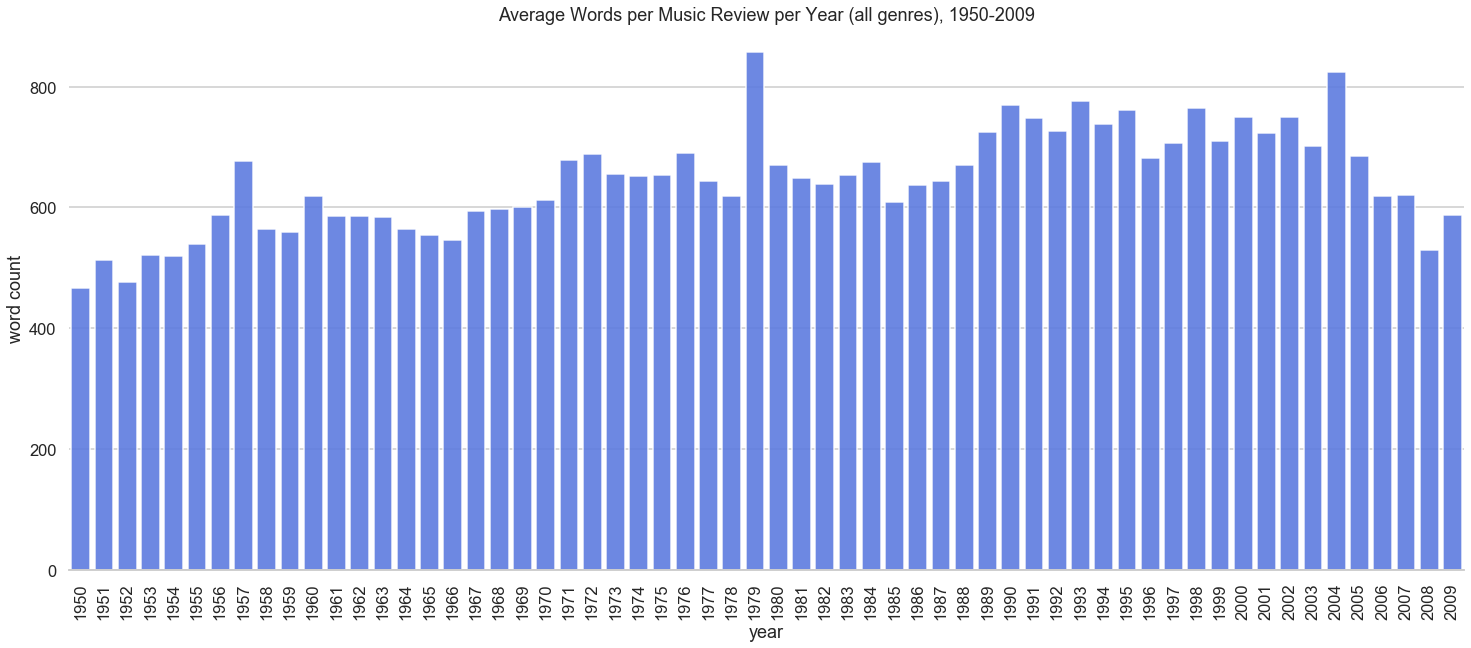

In [130]:
# Visualize the yearly average words per article
sns.set_context("talk")
sns.set_style("whitegrid")
lengths_viz = plt.figure(figsize=(25,10))
lengths_viz = sns.barplot(data=df_yearly_grouped, x="year", y="word count", color="#4770f5", alpha=0.9)
lengths_viz.set(title="Average Words per Music Review per Year (all genres), 1950-2009")
lengths_viz.set_xticklabels(lengths_viz.get_xticklabels(), rotation=90)
sns.despine(left=True)
plt.show()
lengths_viz.figure.savefig("yearly_avg_words_per_review_bar_chart.png")

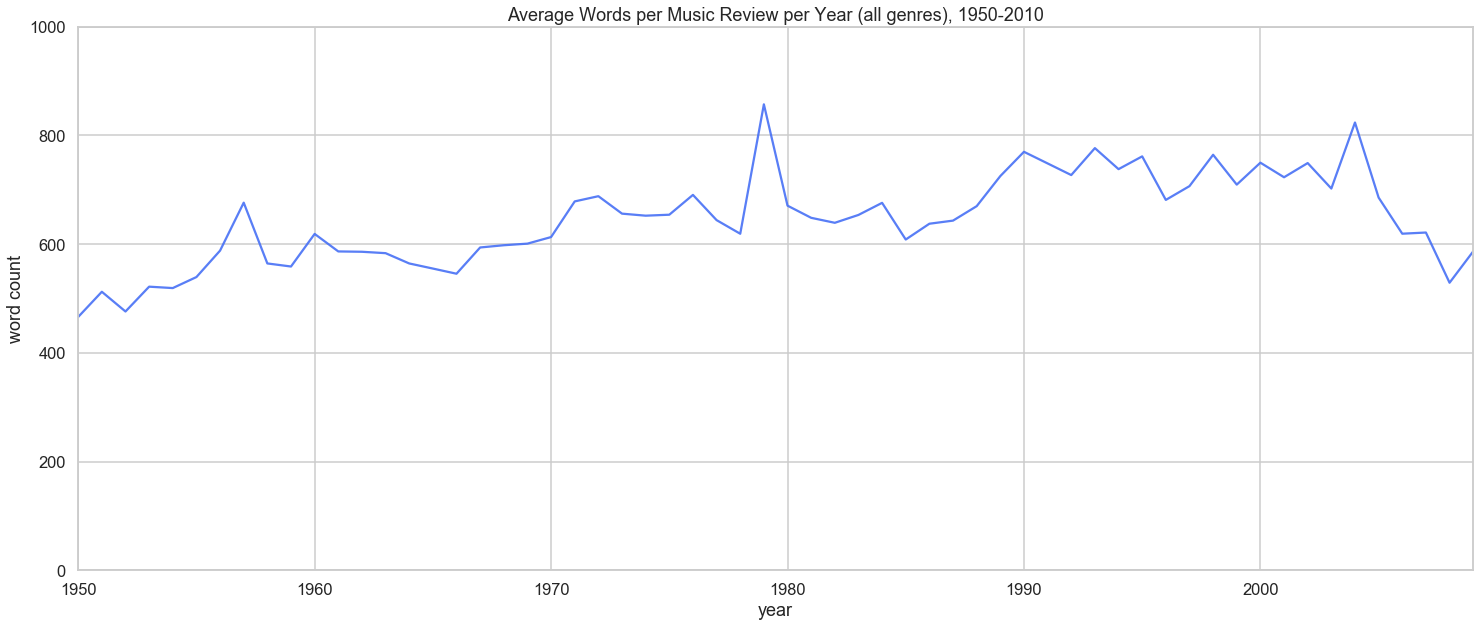

In [84]:
# Visualize the yearly average words per article
sns.set_context("talk")
lengths_viz = plt.figure(figsize=(25,10))
lengths_viz = sns.lineplot(data=df_yearly_grouped, x="year", y="word count", color="#4770f5", alpha=0.9)
lengths_viz.set(title="Average Words per Music Review per Year (all genres), 1950-2010", xlim=(1950,2009), ylim=(0,1000))
lengths_viz.figure.savefig("yearly_avg_words_per_review_line_chart.png")
plt.show()

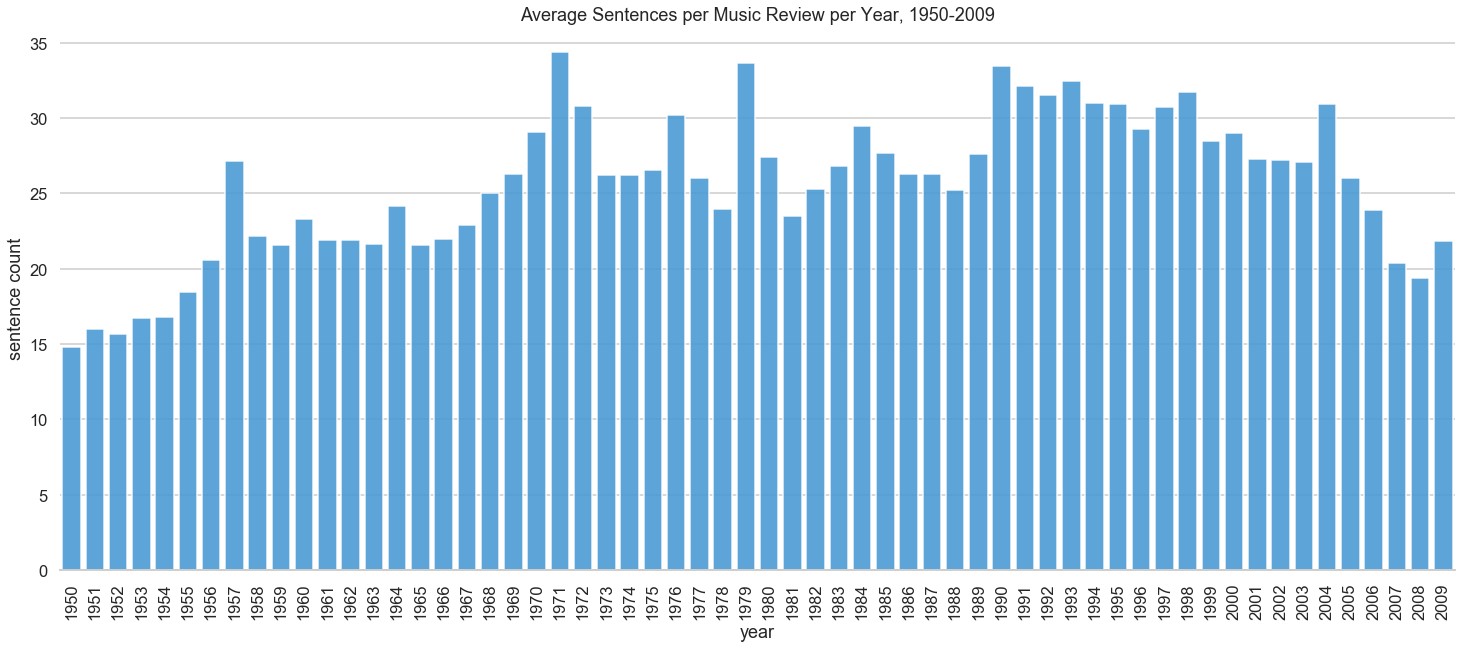

In [132]:
# Visualize the yearly average sentences per article
sns.set_context("talk")
sns.set_style("whitegrid")
lengths_viz = plt.figure(figsize=(25,10))
lengths_viz = sns.barplot(data=df_yearly_grouped, x="year", y="sentence count", color="#349eeb", alpha=0.9)
lengths_viz.set(title="Average Sentences per Music Review per Year, 1950-2009") #, xlim=(1950,2010), ylim=(0,35))
lengths_viz.set_xticklabels(lengths_viz.get_xticklabels(), rotation=90)
sns.despine(left=True)
plt.show()
lengths_viz.figure.savefig("yearly_avg_sentences_per_review_bar_chart.png")

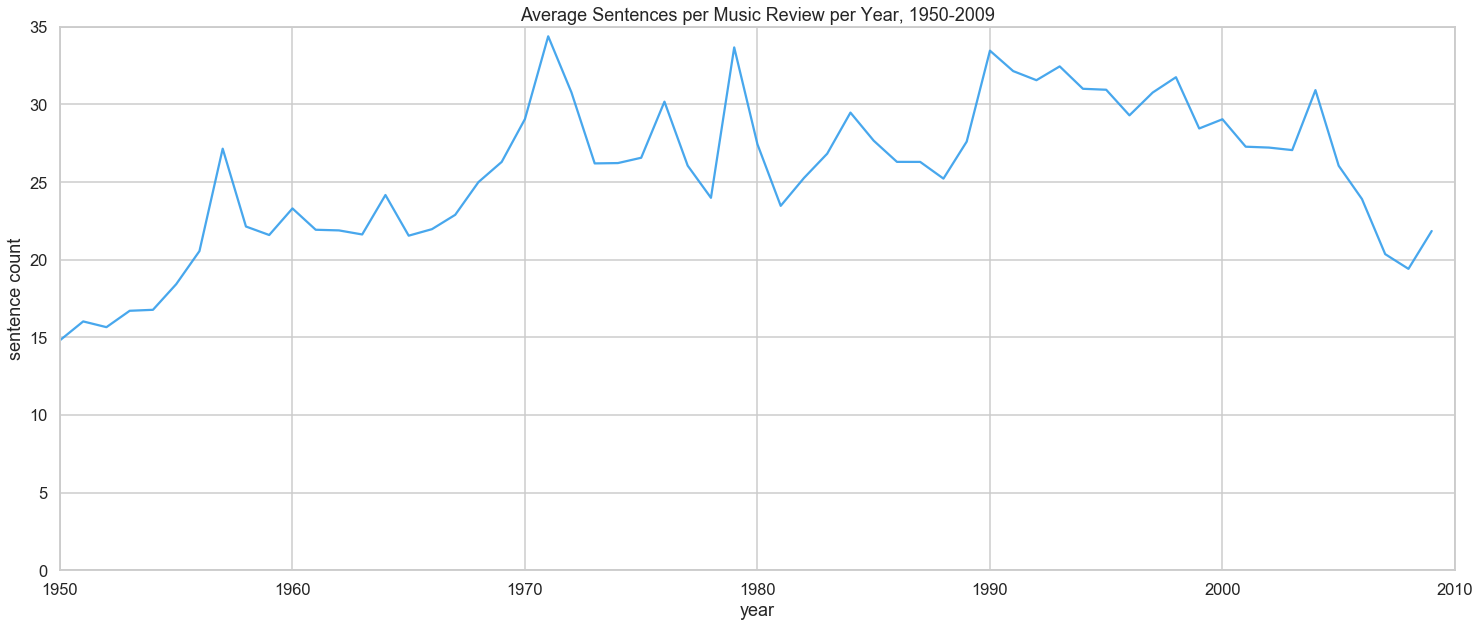

In [85]:
# Visualize the yearly average sentences per article
sns.set_context("talk")
lengths_viz = plt.figure(figsize=(25,10))
lengths_viz = sns.lineplot(data=df_yearly_grouped, x="year", y="sentence count", color="#349eeb", alpha=0.9)
lengths_viz.set(title="Average Sentences per Music Review per Year, 1950-2009", xlim=(1950,2010), ylim=(0,35))
lengths_viz.figure.savefig("yearly_avg_sentences_per_review_line_chart.png")
plt.show()

### 2.2 Article Counts

In [16]:
df_yearly2 = pd.DataFrame({"identifier":list(df.identifier), "year":list(df.year)})
df_yearly_count = df_yearly2.groupby("year").count().reset_index()
df_yearly_count.columns = ["year", "total_articles"]
df_yearly_count.tail()

,year,total_articles
55,2005,2559
56,2006,2387
57,2007,3271
58,2008,611
59,2009,2314


In [17]:
# Check that the counts were made as expected
df_test = df[df.year == 2005]
df_test.shape

(2559, 12)

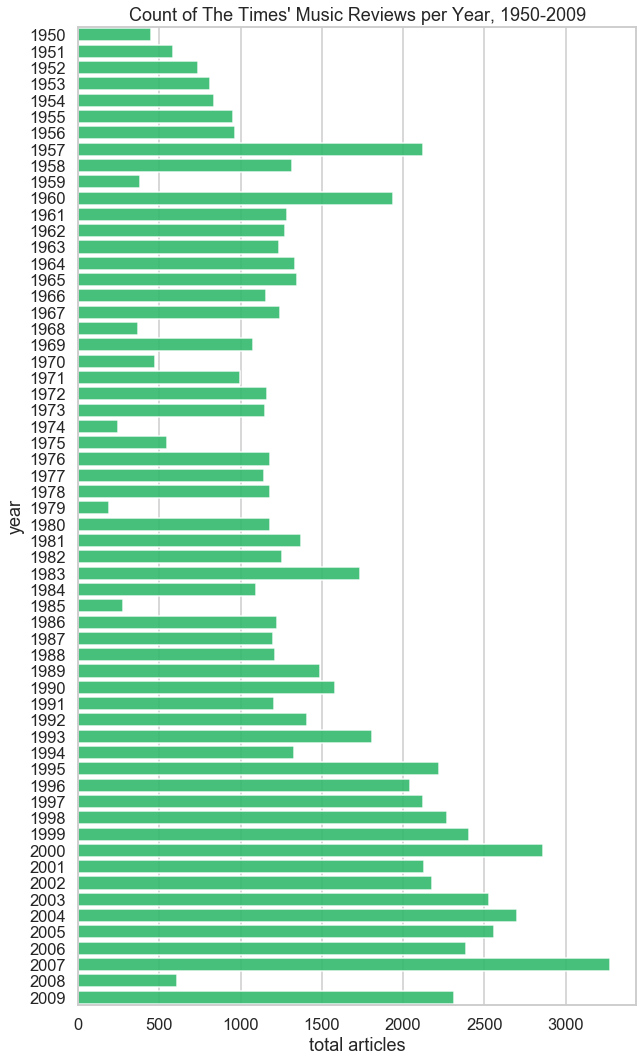

In [184]:
sns.set_context("talk")  # talk, poster
sns.set_style("whitegrid")
count_viz = plt.figure(figsize=(10,18))
count_viz = sns.barplot(data=df_yearly_count, x="total_articles", y="year", color="#1dcf6a", alpha=0.9, orient="h")
count_viz.set(title="Count of The Times' Music Reviews per Year, 1950-2009", xlabel="total articles")  # xticks=[1950, 1955, 1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010]
plt.show()
count_viz.figure.savefig("total_reviews_per_year_bar_chart.png")

### 2.2 By Genre

Let's create subsets of the data for music reviews about opera, jazz, rap, and rock and then create data visualizations focusing on those genres.

In [20]:
def termFilter(term_string, dataframe):
    df_terms = list(dataframe.term)
    with_term = []
    for t in df_terms:
        if term_string in t:
            with_term += [True]
        else:
            with_term += [False]
    
    assert(len(with_term) == len(df_terms))
    return with_term

with_opera = termFilter(" opera", df)
with_jazz = termFilter(" jazz", df)
with_rap = termFilter(" rap", df)
with_rock = termFilter(" rock", df)

In [21]:
df["with_opera"] = with_opera
df["with_jazz"] = with_jazz
df["with_rap"] = with_rap
df["with_rock"] = with_rock
print(df.shape)
df.tail()

(83625, 16)


,identifier,title,year,author,term,section,pages,filename,article_id,issue_id,word_count,sentence_count,with_opera,with_jazz,with_rap,with_rock
83620,106805,JR. ^Fjjf U2 Wembley Stadium *k it itiir ft St...,2009,Stephen Dalton,"[' bands', ' musical', ' pop', ' rock', ' sing...",Reviews,[],/lustre/home/dc125/shared/TDA_GDA_1785-2009/19...,0FFO-2009-0817-0081-003,0FFO-2009-0817,435,21,False,False,False,True
83621,106806,"Pop The Juan MacLean Sub Club, Glasgow Lisa Ve...",2009,Lisa Verrico,"[' album', ' bands', ' pop', ' rave', ' singer...",Reviews,[],/lustre/home/dc125/shared/TDA_GDA_1785-2009/19...,0FFO-2009-0818-0080-002,0FFO-2009-0818,434,14,False,False,False,False
83622,106807,"Edinburgh RSNO/Daniel Usher Hall i%iir*k""kik",2009,Richard Morrison,"[' orchestra', ' songs']",Reviews,[],/lustre/home/dc125/shared/TDA_GDA_1785-2009/19...,0FFO-2009-0818-0080-003,0FFO-2009-0818,422,15,False,False,False,False
83623,106808,Edinburgh Dance ME (Mobile/ Evolution) RAW Out...,2009,Donald Hutera,"[' artists', ' classical', ' dj']",Reviews,[],/lustre/home/dc125/shared/TDA_GDA_1785-2009/19...,0FFO-2009-0818-0081-001,0FFO-2009-0818,472,21,False,False,False,False
83624,106809,Dead-end street,2009,Alex Hardy,[' musical'],Reviews,[],/lustre/home/dc125/shared/TDA_GDA_1785-2009/19...,0FFO-2009-0818-0082-001,0FFO-2009-0818,1131,41,False,False,False,False


In [22]:
df_opera = df[df.with_opera == True]
df_jazz = df[df.with_jazz == True]
df_rap = df[df.with_rap == True]
df_rock = df[df.with_rock == True]
print("Opera articles:",df_opera.shape[0])
print("Jazz articles:",df_jazz.shape[0])
print("Rap articles:",df_rap.shape[0])
print("Rock articles:",df_rock.shape[0])

Opera articles: 18628
Jazz articles: 7681
Rap articles: 1925
Rock articles: 9222


In [23]:
print(df_rap.year.unique())  # some years there aren't any rap articles

[1952 1957 1960 1962 1964 1966 1969 1972 1973 1975 1976 1977 1978 1980
 1981 1982 1983 1984 2000 1986 1987 1988 1989 1990 1991 1992 1993 1994
 1995 1996 1997 1998 1999 2001 2002 2003 2004 2005 2006 2007 2008 2009]


Are there any music reviews that include a combination of these genres?

In [24]:
opera_identifiers = list(df_opera.identifier)
jazz_identifiers = list(df_jazz.identifier)
rap_identifiers = list(df_rap.identifier)
rock_identifiers = list(df_rock.identifier)
multiple_genres = []
for i in opera_identifiers:
    if i in jazz_identifiers:
        multiple_genres += [i]
    if i in rap_identifiers:
        multiple_genres += [i]
    if i in rock_identifiers:
        multiple_genres += [i]
for i in jazz_identifiers:
    if i in rap_identifiers:
        multiple_genres += [i]
    if i in rock_identifiers:
        multiple_genres += [i]
for i in rap_identifiers:
    if i in rock_identifiers:
        multiple_genres += [i]
multiple_genres = set(multiple_genres)
print(len(multiple_genres), "articles appear in the genre subsets of data for more than one of the four genres (opera, jazz, rap, rock)")

4602 articles appear in the genre subsets of data for more than one of the four genres (opera, jazz, rap, rock)


Now let's visualize the number of articles per year for the genres opera, jazz, rap, and rock.

In [25]:
genre = []
for index,row in df.iterrows():
    if row["with_opera"] == True and row["with_jazz"] == False and row["with_rap"] == False and row["with_rock"] == False:
        genre += ["opera"]
    elif row["with_opera"] == False and row["with_jazz"] == True and row["with_rap"] == False and row["with_rock"] == False:
        genre += ["jazz"]
    elif row["with_opera"] == False and row["with_jazz"] == False and row["with_rap"] == True and row["with_rock"] == False:
        genre += ["rap"]
    elif row["with_opera"] == False and row["with_jazz"] == False and row["with_rap"] == False and row["with_rock"] == True:
        genre += ["rock"]
    else:
        genre += ["multiple"]
assert len(genre) == df.shape[0]

In [26]:
df_genres = pd.DataFrame({"identifier":list(df.identifier), "genre":genre, "year":list(df.year), "author":list(df.author), 
                         "word_count":list(df.word_count), "sentence_count":df.sentence_count})
print(df_genres.shape)
df_genres.head()

(83625, 6)


,identifier,genre,year,author,word_count,sentence_count
0,20787,opera,1950,BY OUR MUSIC CRITIC,849,42
1,20788,opera,1950,'',367,14
2,20789,multiple,1950,'',386,11
3,20790,multiple,1950,'',383,8
4,20791,multiple,1950,BY OUR MUSIC CRITIC,738,23


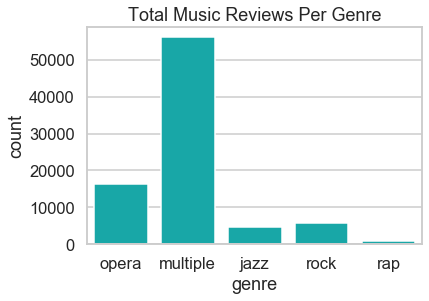

In [27]:
# Number of articles per genre
# sns.catplot(x="year", hue="genre", kind="count", data=df_genres)
per_genre = sns.countplot(x="genre", color="c", data=df_genres)
per_genre.set(title="Total Music Reviews Per Genre")
per_genre.figure.savefig("reviews_per_genre_with_overlaps.png")

In [28]:
df_genres_excl = df_genres[df_genres.genre != "multiple"]
print(df_genres_excl.shape)
df_genres_excl.head()

(27462, 6)


,identifier,genre,year,author,word_count,sentence_count
0,20787,opera,1950,BY OUR MUSIC CRITIC,849,42
1,20788,opera,1950,'',367,14
5,20792,opera,1950,'',249,8
10,20797,opera,1950,'',767,21
13,20800,opera,1950,'',853,34


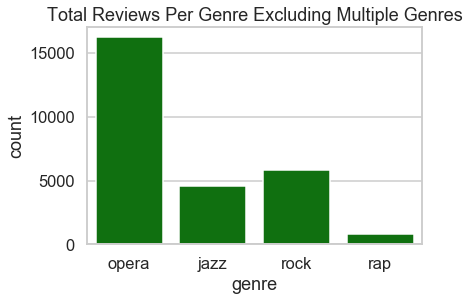

In [29]:
per_genre_excl = sns.countplot(x="genre", color="g", data=df_genres_excl)
per_genre_excl.set(title="Total Reviews Per Genre Excluding Multiple Genres")
per_genre_excl.figure.savefig("reviews_per_genre_without_overlap.png")

In [30]:
# df_genres_grouped = df_genres.groupby("year")
# df_genres_grouped.head()

def getArticlesPerGenrePerYear(df, genre):
    genre_only = df[df.genre == genre]
    genre_year_counts = []
    years = df.year.unique()
    for y in years:
        genre_year_counts += [(genre_only[genre_only.year == y]).shape[0]]
    return genre_year_counts
    
opera_yearly = getArticlesPerGenrePerYear(df_genres, "opera")
jazz_yearly = getArticlesPerGenrePerYear(df_genres, "jazz")
rap_yearly = getArticlesPerGenrePerYear(df_genres, "rap")
rock_yearly = getArticlesPerGenrePerYear(df_genres, "rock")

In [31]:
years = df_genres.year.unique()
df_genre_yearly = pd.DataFrame({"year":years, "opera":opera_yearly, "jazz":jazz_yearly, "rap":rap_yearly, "rock":rock_yearly})
df_genre_yearly.head()

,year,opera,jazz,rap,rock
0,1950,114,4,0,1
1,1951,154,2,0,3
2,1952,155,2,2,6
3,1953,207,4,0,4
4,1954,201,5,0,6


In [223]:
df_genre_yearly_melted = df_genre_yearly.melt(id_vars=["year"], value_vars=["opera", "jazz", "rap", "rock"])
df_genre_yearly_melted.rename(columns={"year":"year", "variable":"genre", "value":"total articles"}, inplace=True)
df_genre_yearly_melted.head()

,year,genre,total articles
0,1950,opera,114
1,1951,opera,154
2,1952,opera,155
3,1953,opera,207
4,1954,opera,201


In [225]:
df_genre_yearly_melted["total articles"].replace({0:np.nan}, inplace=True)

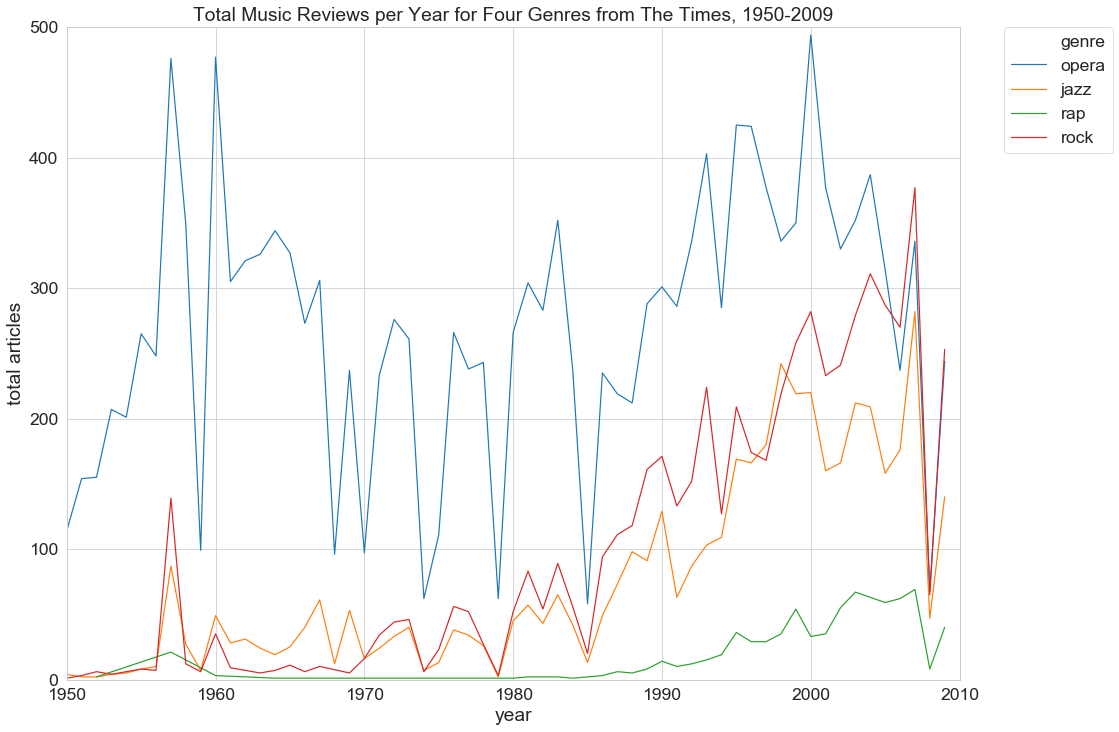

In [228]:
genre_year_viz = plt.figure(figsize=(16,12))
genre_year_viz = sns.lineplot(data=df_genre_yearly_melted, x="year", y="total articles", hue="genre")
genre_year_viz.set(title="Total Music Reviews per Year for Four Genres from The Times, 1950-2009", ylim=(0,500), xlim=(1950,2010))
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
genre_year_viz.figure.savefig("reviews_per_year_per_genre_line.png")